In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define Cities (x, y coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}

N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

# Step 3: Route Distance Function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[(i + 1) % N]] for i in range(N))

In [2]:
# Step 4: Bee Algorithm Parameters
NUM_BEES = 50
NUM_ELITE = 5
NUM_SELECTED = 15
NUM_RECRUIT_ELITE = 7
NUM_RECRUIT_SELECTED = 3
MAX_ITER = 200

In [3]:
# Step 5: Neighborhood Search
def neighborhood_search(route, size):
    best = route[:]
    best_cost = route_distance(best)
    for _ in range(size):
        neighbor = best[:]
        i, j = random.sample(range(N), 2)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        cost = route_distance(neighbor)
        if cost < best_cost:
            best = neighbor
            best_cost = cost
    return best

In [4]:
# Step 6: Initialize Population
population = [random.sample(range(N), N) for _ in range(NUM_BEES)]
best_distance_history = []

In [5]:
population

[[5, 3, 1, 0, 2, 4],
 [1, 4, 2, 0, 5, 3],
 [4, 0, 3, 2, 1, 5],
 [5, 3, 0, 1, 2, 4],
 [0, 3, 2, 4, 1, 5],
 [5, 4, 2, 1, 0, 3],
 [0, 5, 1, 2, 3, 4],
 [2, 4, 0, 1, 5, 3],
 [5, 3, 4, 2, 1, 0],
 [1, 0, 4, 3, 5, 2],
 [3, 2, 1, 0, 4, 5],
 [3, 0, 1, 4, 2, 5],
 [4, 3, 5, 2, 1, 0],
 [0, 1, 3, 2, 5, 4],
 [1, 3, 0, 5, 2, 4],
 [1, 3, 2, 0, 5, 4],
 [5, 3, 1, 0, 4, 2],
 [2, 0, 4, 3, 5, 1],
 [2, 0, 5, 4, 3, 1],
 [4, 5, 3, 2, 0, 1],
 [0, 2, 1, 3, 4, 5],
 [3, 4, 2, 0, 1, 5],
 [1, 5, 0, 3, 2, 4],
 [0, 2, 4, 3, 1, 5],
 [2, 5, 3, 0, 4, 1],
 [4, 3, 0, 5, 1, 2],
 [2, 4, 5, 3, 1, 0],
 [0, 1, 4, 5, 3, 2],
 [1, 5, 2, 0, 4, 3],
 [4, 5, 3, 1, 0, 2],
 [3, 4, 0, 5, 2, 1],
 [0, 2, 4, 3, 5, 1],
 [3, 1, 4, 5, 0, 2],
 [1, 3, 5, 0, 2, 4],
 [1, 3, 4, 2, 5, 0],
 [4, 1, 2, 0, 5, 3],
 [4, 0, 2, 5, 3, 1],
 [4, 0, 2, 1, 3, 5],
 [1, 0, 4, 5, 2, 3],
 [1, 5, 0, 3, 4, 2],
 [0, 2, 3, 1, 4, 5],
 [4, 2, 1, 5, 3, 0],
 [0, 4, 3, 2, 1, 5],
 [4, 5, 0, 1, 2, 3],
 [5, 2, 4, 1, 0, 3],
 [2, 1, 5, 4, 0, 3],
 [3, 1, 4, 0, 2, 5],
 [2, 3, 1, 0,

In [6]:

for iteration in range(MAX_ITER):
    population.sort(key=route_distance)
    next_population = []

    # Elite sites
    for i in range(NUM_ELITE):
        bee = population[i]
        for _ in range(NUM_RECRUIT_ELITE):
            new_bee = neighborhood_search(bee, 3)
            next_population.append(new_bee)

    # Selected (non-elite) sites
    for i in range(NUM_ELITE, NUM_SELECTED):
        bee = population[i]
        for _ in range(NUM_RECRUIT_SELECTED):
            new_bee = neighborhood_search(bee, 2)
            next_population.append(new_bee)

    # Scout bees (random new solutions)
    while len(next_population) < NUM_BEES:
        next_population.append(random.sample(range(N), N))

    population = next_population
    best_bee = min(population, key=route_distance)
    best_distance_history.append(route_distance(best_bee))

# Step 7: Output
best_route = min(population, key=route_distance)
print("Best route found:", best_route)
print("Minimum distance:", route_distance(best_route))

Best route found: [1, 3, 4, 5, 2, 0]
Minimum distance: 25.17945989469863


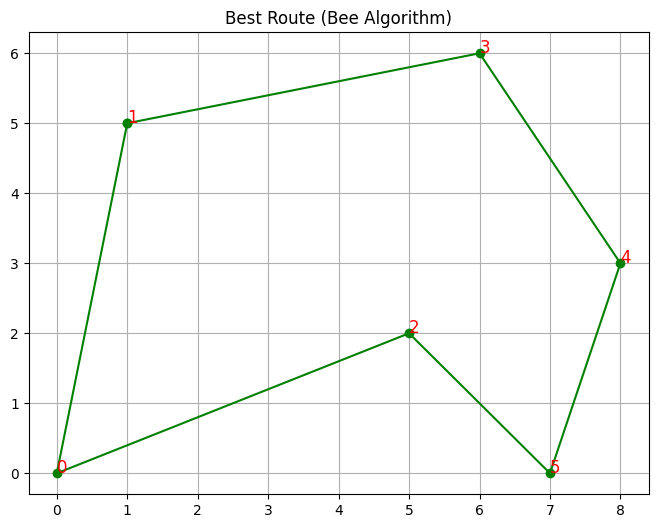

In [7]:
# Visualize Best Route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='green')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (Bee Algorithm)")
    plt.grid()
    plt.show()

plot_route(best_route)